In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing loan dataset

In [3]:
loan = pd.read_csv('loan.csv')

In [4]:
loan.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# check shape
loan.shape

(39717, 111)

## Data Cleaning


In [6]:
#lets check number of missing values in each columns  

In [7]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# we can see some columns have all the rows as null values. 
# we need to drop these values as these are of no use to us.

In [9]:
# we need to remove these columns using dropna method and passing'all' in the how option
loan.dropna(axis=1,how='all',inplace = True)

In [10]:
loan.shape

(39717, 57)

In [11]:
#now our data has been cleaned and does not contain columns which are all NaN values.

In [12]:
#now lets analyse other columns having missing /NaN values

In [15]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [13]:
# as we can see there are still some columns which have large number of missing values 
# let us drop the columns which have missing values > 5000 

In [14]:
n= loan.isna().sum() 
c= n[n> 5000].index.tolist() # creating a list of columns in which there are more than 5000 missing values

In [15]:
c  # these are the 4 columns which needs to be removed

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [16]:
loan.drop(columns = c,inplace = True)

In [17]:
loan.shape

(39717, 53)

In [18]:
# as we can see the 4 columns which were having count of null values > 5000 have been dropped

In [19]:
loan.isna().sum() 

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [20]:
# now before we replace missing values of columns lets see which columns are not required for our analysis

In [21]:
#lets see number of unique values of each columns
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [23]:
# as we can see some of the columns have only 1 value. We obviously won't require these for out analysis.
#let us drop these columns
a = loan.nunique()
b = a[a == 1].index.tolist() #creating a list of columns to be dropped
b

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [24]:
loan.drop(columns = b, inplace = True)

In [25]:
loan.shape

(39717, 44)

In [26]:
# We need to go through the columns in data dictionary to understand the meaning of each columns 
# and understand which columns are not required for our analysis

In [27]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [28]:
# columns like id , member id, url  are unique for all rows and can't be categorised as well so lets drop these 3 columns

In [29]:
loan.drop(columns = ['id','member_id','url'],inplace = True)

In [30]:
loan.shape

(39717, 41)

In [31]:
# now from our understanding of the data, there are 2 types of attributes
# one which are created before accepting loan
# one which are created after loan has been accepted.
# now for our problem statement we need to find the factors which influence the defaulting of loans and
# reject loan to  such applicants based on our findings
# so we will primarily focus on the attributes created before accepting loans so that we can find risky applicants beforehand.


In [32]:
# so let us drop the attributes/collumns which are created after the loan application has been accepted.

In [33]:
# let us create a list of the columns which need to be dropped.

l = ['inq_last_6mths','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
    'last_credit_pull_d',]

loan.drop(columns = l, inplace =  True)

In [34]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [35]:
loan.shape

(39717, 28)

In [36]:
# let us analyse values of each of these columns carefully to identify if any further cleaning required.

In [37]:
loan.isna().mean() * 100 # calculate %age of null values in each column

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.191303
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.027696
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [38]:
# we can see emp_title, emp_length, title, revol_util, pub_rec_bankruptcies  have some null values
#we will check these columns

In [39]:
#let us also check datatypes of all columns
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [40]:
# we can see columns: term, int_rate and revol_util are object datatype. We can convert them to int or float for better analysis

In [41]:
# also issue_d, earliest_cr_line can be in datetime format 

In [42]:
loan.term

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

In [43]:
# term is in months so we can convert it to integer so that it becomes easy for our analysis
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [44]:
loan.term  = loan.term.apply(lambda x : int(x[1:3]))   # there are some blank spaces before term values

In [45]:
loan.term

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

In [46]:
loan.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [47]:
# int rate can be converted to float by removing % sign for making our analysis easier
loan.int_rate = loan.int_rate.apply(lambda x : float(x[:-1]))


In [48]:
loan.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [49]:
loan.emp_title

0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [50]:
loan.emp_title.nunique()

28820

In [51]:
# this column has very large number of unique values which makes it harder to categorize.
#let us drop this column
loan.drop(columns='emp_title',inplace = True)

In [52]:
loan.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [53]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [54]:
loan.emp_length.isna().mean()

0.027066495455346576

In [55]:
#let us drop the null valued rows for 'emp_length'

loan.dropna(subset = ['emp_length'],inplace=True)

In [56]:
loan.title

0                         Computer
1                             bike
2             real estate business
3                         personel
4                         Personal
                   ...            
39712             Home Improvement
39713    Retiring credit card debt
39714       MBA Loan Consolidation
39715                     JAL Loan
39716           Consolidation Loan
Name: title, Length: 38642, dtype: object

In [57]:
loan.title.nunique()

19148

In [58]:
#again there are too many unique values which makes it hard to categorize this column for analysis
#let us drop this column
loan.drop(columns='title',inplace = True)

In [59]:
loan.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38642, dtype: object

In [60]:
# since utilization is in %age let us drop the %sign and convert it to float

In [61]:
loan.revol_util = loan.revol_util.str.replace('%','')

In [62]:
loan.revol_util = loan.revol_util.astype('float')

In [63]:
#let us also check %age of null values in this column
loan.revol_util.isna().mean() *100

0.1216293152528337

In [64]:
#let us drop these null valued rows
loan.dropna(subset = ['revol_util'],inplace=True)

In [65]:
loan.pub_rec_bankruptcies

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: pub_rec_bankruptcies, Length: 38595, dtype: float64

In [66]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [67]:
# let us remove null valued rows for this column as well
loan.dropna(subset = ['pub_rec_bankruptcies'],inplace=True)

In [68]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [69]:
loan.earliest_cr_line.unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [70]:
# we can take only the year value of earliest_cr_line column. That will be sufficient for out analysis
# lets use a function to clean this column

def d_to_yr(x):
    c = x[-2:]        #storing last 2 characters in a variable
    if c[0] == '0':    
        y = '20' + c  #years ending with 02,04,05 etc in our case means 2002,2004,2005 and so on 
    else:
        y = '19' + c  #years ending with 98,97,89 etc in our case means 1998,1997,1989 and so on 
    return int(y)


        

In [71]:
# creating a new column for the year part of earliest_cr_line
loan['earliest_cr_line_y'] =  loan.earliest_cr_line.apply(d_to_yr) 

In [72]:
loan.earliest_cr_line_y

0        1985
1        1999
2        2001
3        1996
4        1996
         ... 
39562    2000
39573    1989
39623    1997
39666    1992
39680    2000
Name: earliest_cr_line_y, Length: 37898, dtype: int64

In [73]:
#we can now drop 'earliest_cr_line' column as we already extracted year from it 
loan.drop(columns = 'earliest_cr_line',inplace = True)

In [74]:
loan.shape

(37898, 26)

In [75]:
#now let's fix issue_d column

In [76]:
loan.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Aug-07'], dtype=object)

In [77]:
# as we can see issue_d is of format MMM-YY , we have to extract both month and year and keep them as separate columns
# now since all years are greater than 2000 so we can just concat '20' to the last 2 characters to get year


loan['issue_year'] = loan.issue_d.apply(lambda x : int('20' + x[-2:]))
loan['issue_month'] = loan.issue_d.apply(lambda x : x[:3])

In [78]:
#now we can drop issue_d column
loan.drop(columns = 'issue_d', inplace = True)

In [79]:
loan.shape

(37898, 27)

In [80]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'earliest_cr_line_y', 'issue_year', 'issue_month'],
      dtype='object')

In [81]:
# now let us check all remaing columns one last time before proceeding with Univariate analysis

In [82]:
loan.loan_amnt.unique()

array([ 5000,  2500,  2400, 10000,  3000,  7000,  5600,  5375,  6500,
       12000,  9000,  1000,  3600,  6000,  9200, 20250, 21000, 15000,
        4000,  8500,  4375, 31825, 12400, 10800, 12500,  9600,  4400,
       14000, 11000, 25600, 16000,  7100, 13000, 17500, 17675,  8000,
        3500, 16425,  8200, 20975,  6400, 14400,  7250, 18000, 35000,
       11800,  4500, 10500, 15300, 20000,  6200,  7200,  9500, 18825,
       24000,  2100,  5500, 26800, 25000, 19750, 13650, 28000, 10625,
        8850,  6375, 11100,  4200,  8875, 13500, 21600,  8450, 13475,
       22000,  7325,  7750, 13350, 22475,  8400, 13250,  7350, 11500,
       29500,  2000, 11625, 15075,  5300,  8650,  7400, 24250, 26000,
        1500, 19600,  4225, 16500, 15600, 14125, 13200, 12300,  1400,
        3200, 11875,  1800, 23200,  4800,  7300, 10400,  6600, 30000,
        4475,  6300,  8250,  9875, 21500,  7800,  9750, 15550, 17000,
        7500,  5800,  8050,  5400,  4125,  9800, 15700,  9900,  6250,
       10200, 23000,

In [83]:
loan.funded_amnt.unique()

array([5000, 2500, 2400, ..., 1175,  500,  725], dtype=int64)

In [84]:
loan.funded_amnt_inv.unique()

array([4975., 2500., 2400., ...,  700.,  600.,  525.])

In [85]:
loan.installment.unique()

array([162.87,  59.83,  84.33, ..., 155.52, 507.46,  99.44])

In [86]:
loan.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [87]:
loan.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [88]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [89]:
loan.annual_inc.unique()

array([ 24000.  ,  30000.  ,  12252.  , ...,  11029.  , 100671.39,
        36153.  ])

In [90]:
loan.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [91]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [92]:
# here for our problem statement, we won't be requiring the value 'Current' as we want to know risky applicants before issuing loan.
# let us drop these values

loan = loan[loan['loan_status'] != 'Current']

In [93]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [94]:
loan.shape

(36800, 27)

In [95]:
loan.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [96]:
loan.zip_code.unique()

array(['860xx', '309xx', '606xx', '917xx', '852xx', '280xx', '900xx',
       '958xx', '774xx', '853xx', '913xx', '245xx', '951xx', '641xx',
       '921xx', '067xx', '890xx', '770xx', '335xx', '799xx', '605xx',
       '103xx', '150xx', '326xx', '564xx', '141xx', '080xx', '974xx',
       '934xx', '405xx', '946xx', '445xx', '850xx', '292xx', '088xx',
       '180xx', '029xx', '700xx', '010xx', '441xx', '104xx', '061xx',
       '616xx', '947xx', '914xx', '765xx', '980xx', '017xx', '972xx',
       '752xx', '787xx', '077xx', '540xx', '225xx', '440xx', '437xx',
       '559xx', '912xx', '325xx', '300xx', '923xx', '352xx', '013xx',
       '146xx', '074xx', '786xx', '937xx', '331xx', '115xx', '191xx',
       '114xx', '908xx', '902xx', '750xx', '950xx', '329xx', '226xx',
       '992xx', '614xx', '083xx', '100xx', '926xx', '931xx', '712xx',
       '060xx', '707xx', '342xx', '604xx', '895xx', '430xx', '919xx',
       '996xx', '891xx', '935xx', '801xx', '928xx', '233xx', '927xx',
       '970xx', '211

In [97]:
# here we can see there are too many unique values and also the zip code has been masked, so its better to drop this column

In [98]:
loan.drop(columns = 'zip_code', inplace = True)

In [99]:
loan.shape

(36800, 26)

In [100]:
loan.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN'], dtype=object)

In [101]:
loan.dti.unique()

array([27.65,  1.  ,  8.72, ...,  0.05,  0.12, 25.43])

In [102]:
loan.delinq_2yrs.unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11], dtype=int64)

In [103]:
loan.open_acc.unique()

array([ 3,  2, 10,  9,  7,  4, 11, 14, 12, 20,  8,  6, 15, 17,  5, 13, 16,
       30, 21, 18, 19, 27, 23, 34, 25, 22, 24, 26, 32, 28, 29, 33, 31, 39,
       35, 36, 38, 44], dtype=int64)

In [104]:
loan.pub_rec.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [105]:
loan.revol_bal.unique()

array([13648,  1687,  2956, ..., 13126, 14930, 26233], dtype=int64)

In [106]:
# revoling balance is balance used up from a given credit limit
# since we dont have any column with credit limit , revol_balance column will itself not serve much purpose.
# for our problem , revolving utilization %age column is sufficient 

# let us drop this column 
loan.drop(columns = 'revol_bal',inplace=True)

In [107]:
loan.total_acc.unique()

array([ 9,  4, 10, 37, 12, 11, 13,  3, 23, 34, 29, 28, 42, 14, 22, 38, 21,
       17,  7, 31, 44, 26, 16,  6, 18, 27, 25, 40, 35, 24,  8, 20, 15, 19,
       36, 51, 32, 30, 33, 46,  5, 61, 56, 50, 41, 79, 62, 43, 47, 53, 45,
       60, 55, 39, 52, 58, 54, 57, 49, 63, 48, 59, 77, 87, 75, 72, 64, 67,
       78, 74, 66, 81, 90, 80, 71, 69, 73, 70, 68, 65,  2], dtype=int64)

In [108]:
# our data has now been cleaned 
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'earliest_cr_line_y', 'issue_year',
       'issue_month'],
      dtype='object')

Let us create a derived column from loan status named charged off which will have value 1 if loan has been charged or value 0 if loan is fully paid.This will be useful for calculating percentage of charge off loans for each column
<br>
NOTE : We will use this column only for plotting percentage plots 

In [109]:
loan['charged off'] = loan.loan_status.apply(lambda x: 1 if x=='Charged Off' else 0)

In [110]:
loan['charged off']

0        0
1        1
2        0
3        0
5        0
        ..
39562    0
39573    0
39623    1
39666    1
39680    0
Name: charged off, Length: 36800, dtype: int64

In [111]:
#let us proceed with univariate analysis


# Univariate Analysis

In [113]:
#let us make 2 list one for categorical columns and another for numerical columns

cat_col = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'addr_state','earliest_cr_line_y', 'pub_rec', 'pub_rec_bankruptcies',
       'issue_year', 'issue_month', 'delinq_2yrs']

num_col = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment','annual_inc','dti',
       'revol_util','total_acc', 'open_acc']




## Univariate analysis on Categorical columns
<br>
For univariate analysis on Categorical columns we will plot percentage of charged off loans vs fully paid for each column
<br>
except columns : 'addr_state' and 'earliest_cr_line_y' 

loan_status
Fully Paid     31534
Charged Off     5266
Name: count, dtype: int64


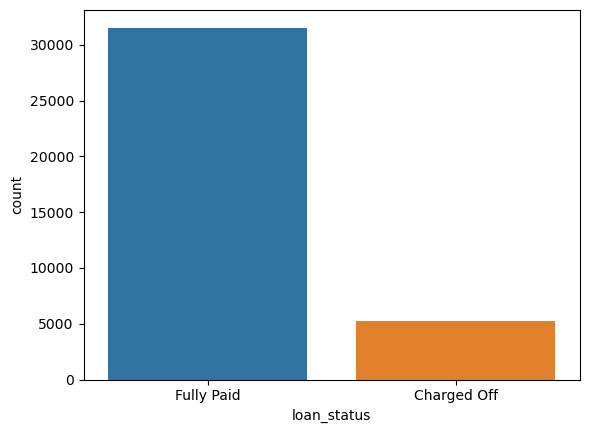

In [115]:
# loan status univariate 
print(loan.loan_status.value_counts())
sns.countplot(x= loan.loan_status)
plt.show()

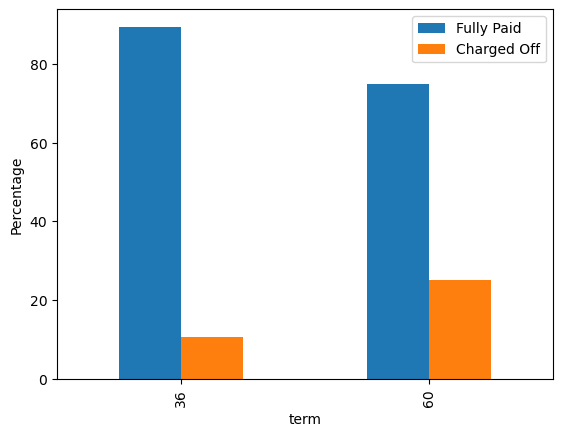

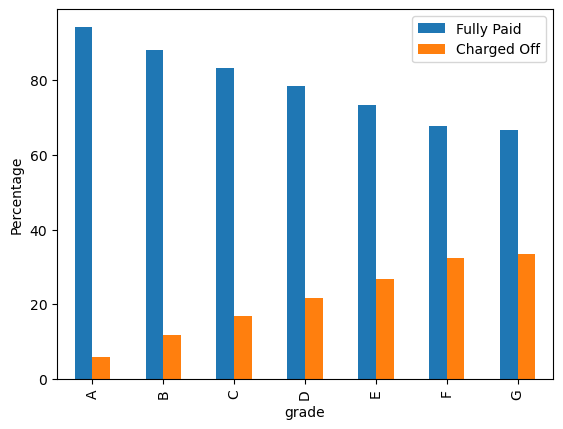

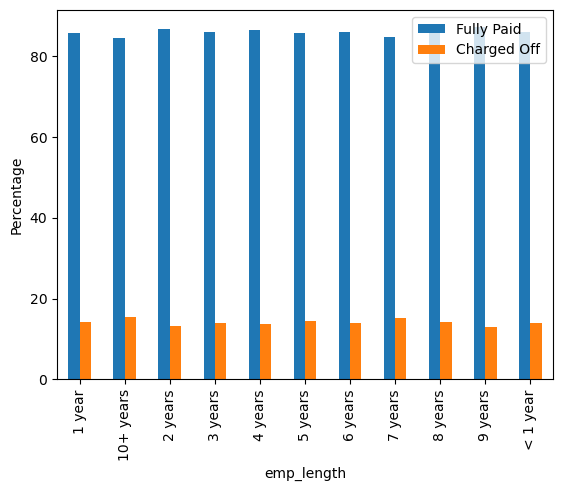

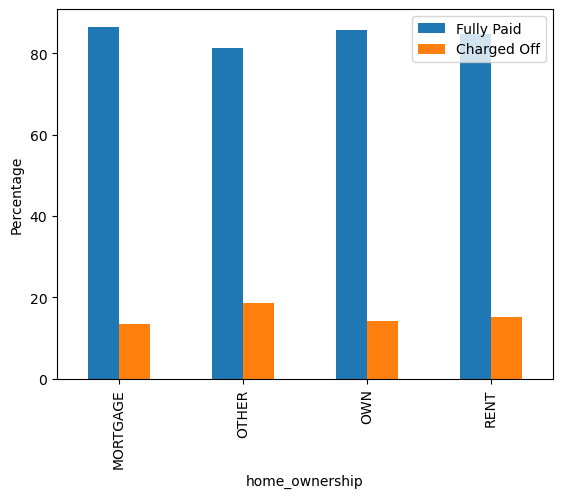

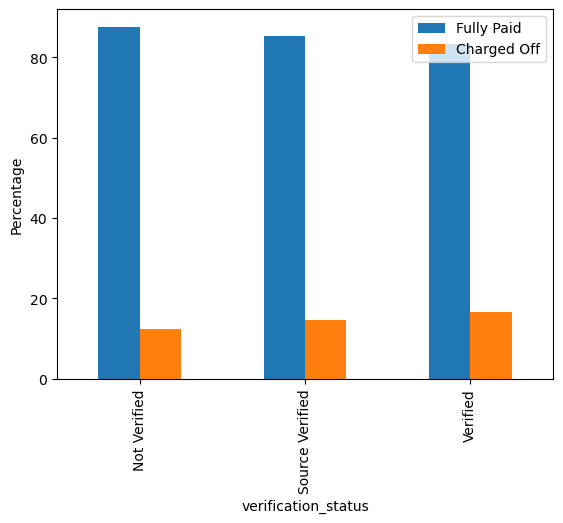

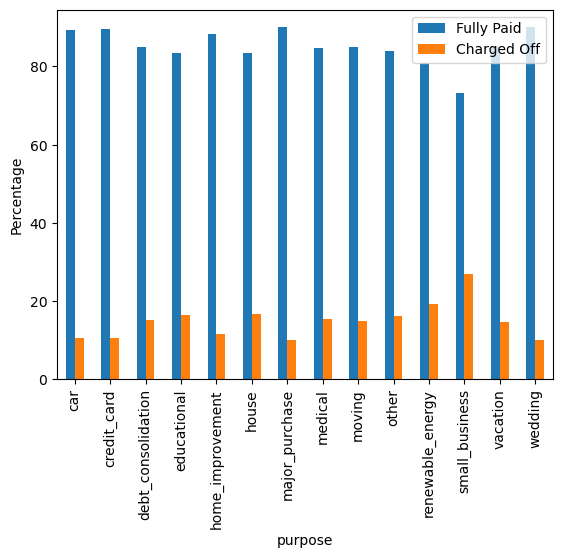

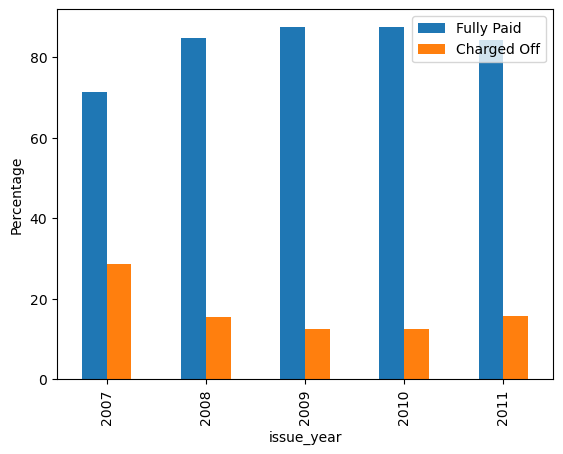

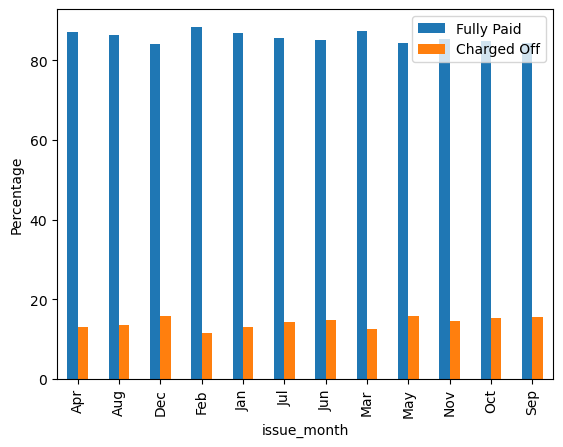

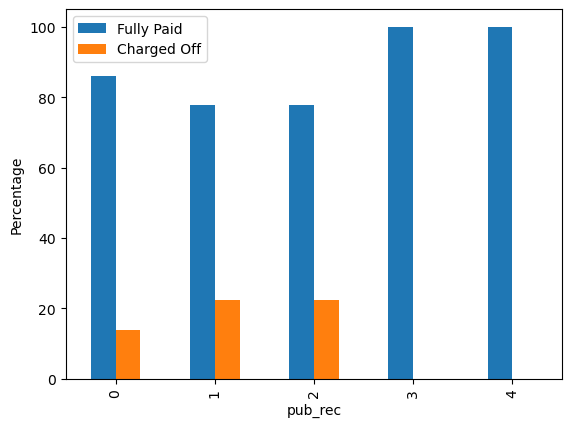

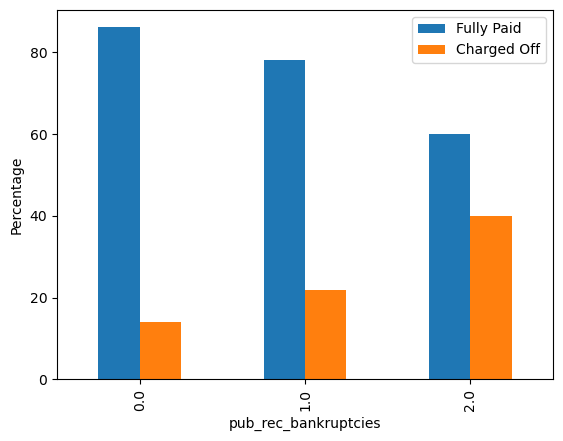

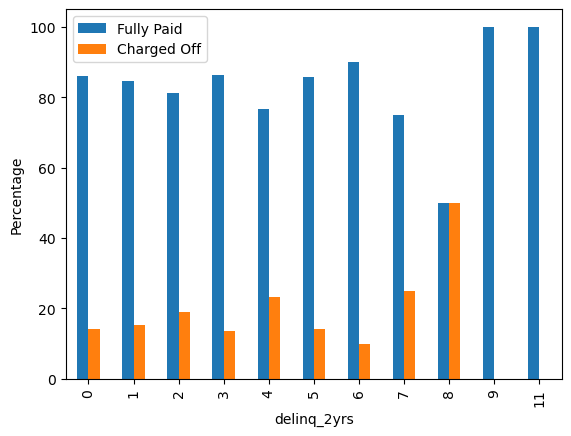

In [116]:
for col in ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose',
       'issue_year', 'issue_month', 'pub_rec', 'pub_rec_bankruptcies','delinq_2yrs']:
    
    #calculate %age of charged off and fully paid loans for each column
    chargedoff_percentage = loan.groupby(col)['charged off'].mean() *100
    fullypaid_percentage = (1- loan.groupby(col)['charged off'].mean()) *100 
    
    #create a dataframe using both percentages
    percentages = pd.DataFrame({'Fully Paid': fullypaid_percentage,'Charged Off': chargedoff_percentage})

    #plot the results
    percentages.plot(kind='bar',stacked = False )
    plt.ylabel('Percentage')
    plt.show()


In [117]:
# column 'addr_state'

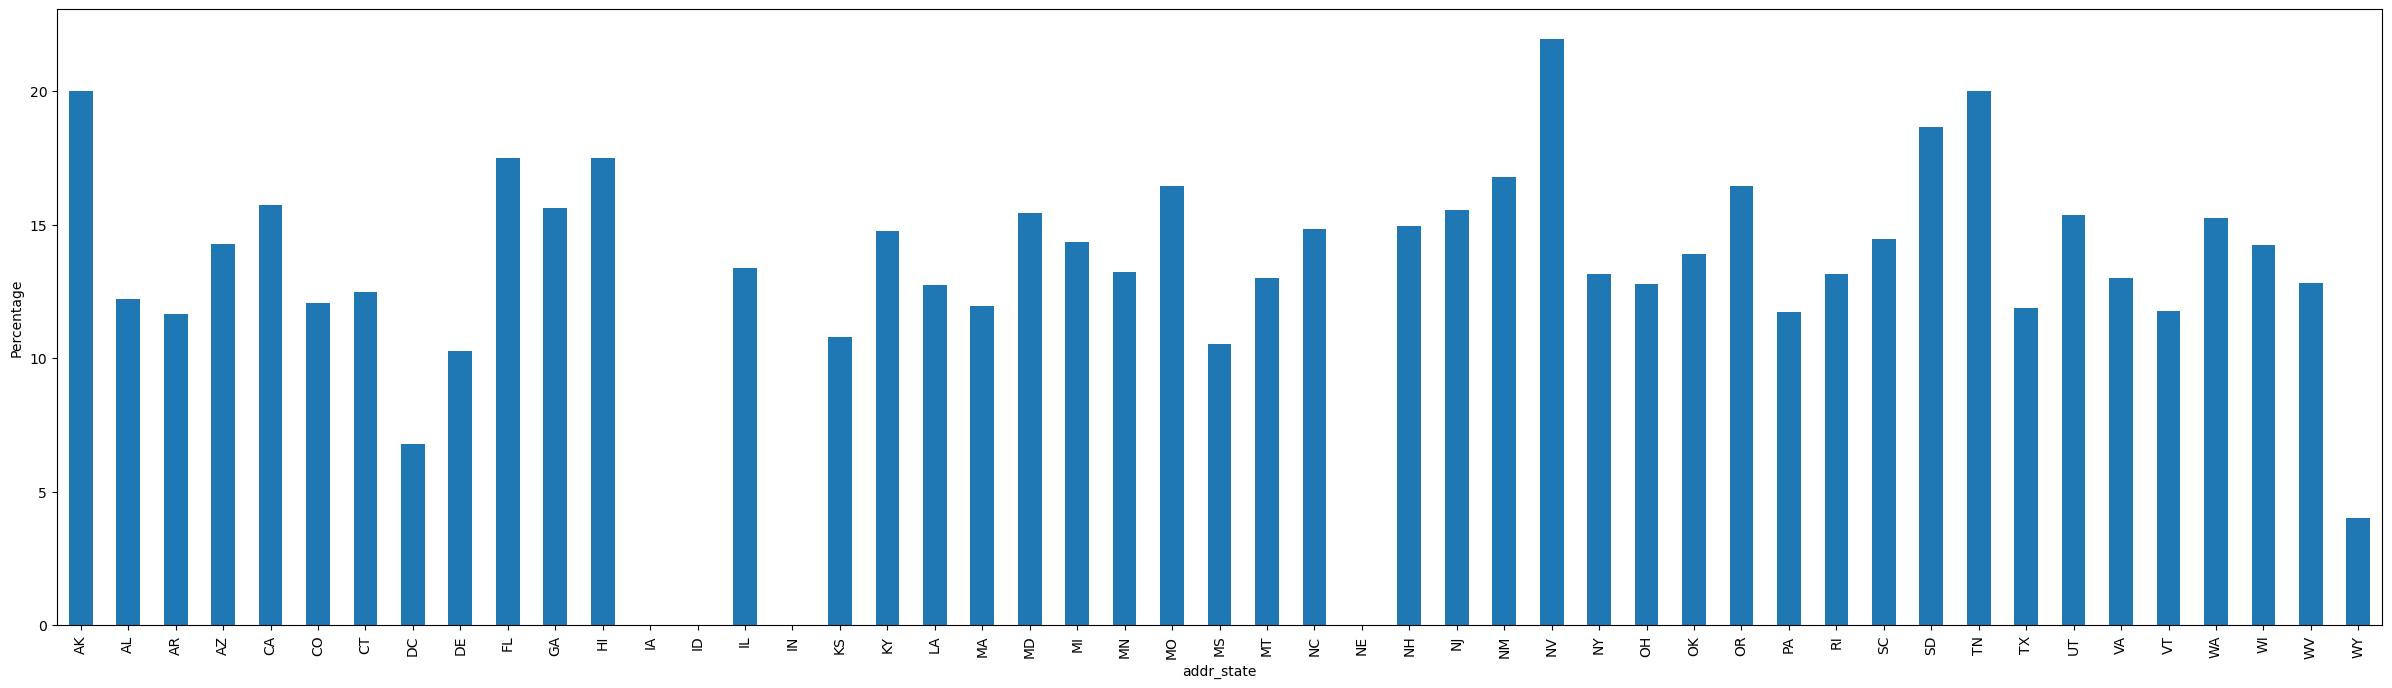

In [118]:
chargedoff_percentage = loan.groupby('addr_state')['charged off'].mean() *100
#fullypaid_percentage = (1- loan.groupby('addr_state')['charged off'].mean()) *100 
#percentages = pd.DataFrame({'Fully Paid': fullypaid_percentage,'Charged Off': chargedoff_percentage})
plt.figure(figsize=(30, 8))
chargedoff_percentage.plot(kind='bar' )
plt.ylabel('Percentage')
plt.show()


In [119]:
#column : 'earliest_cr_line_y'

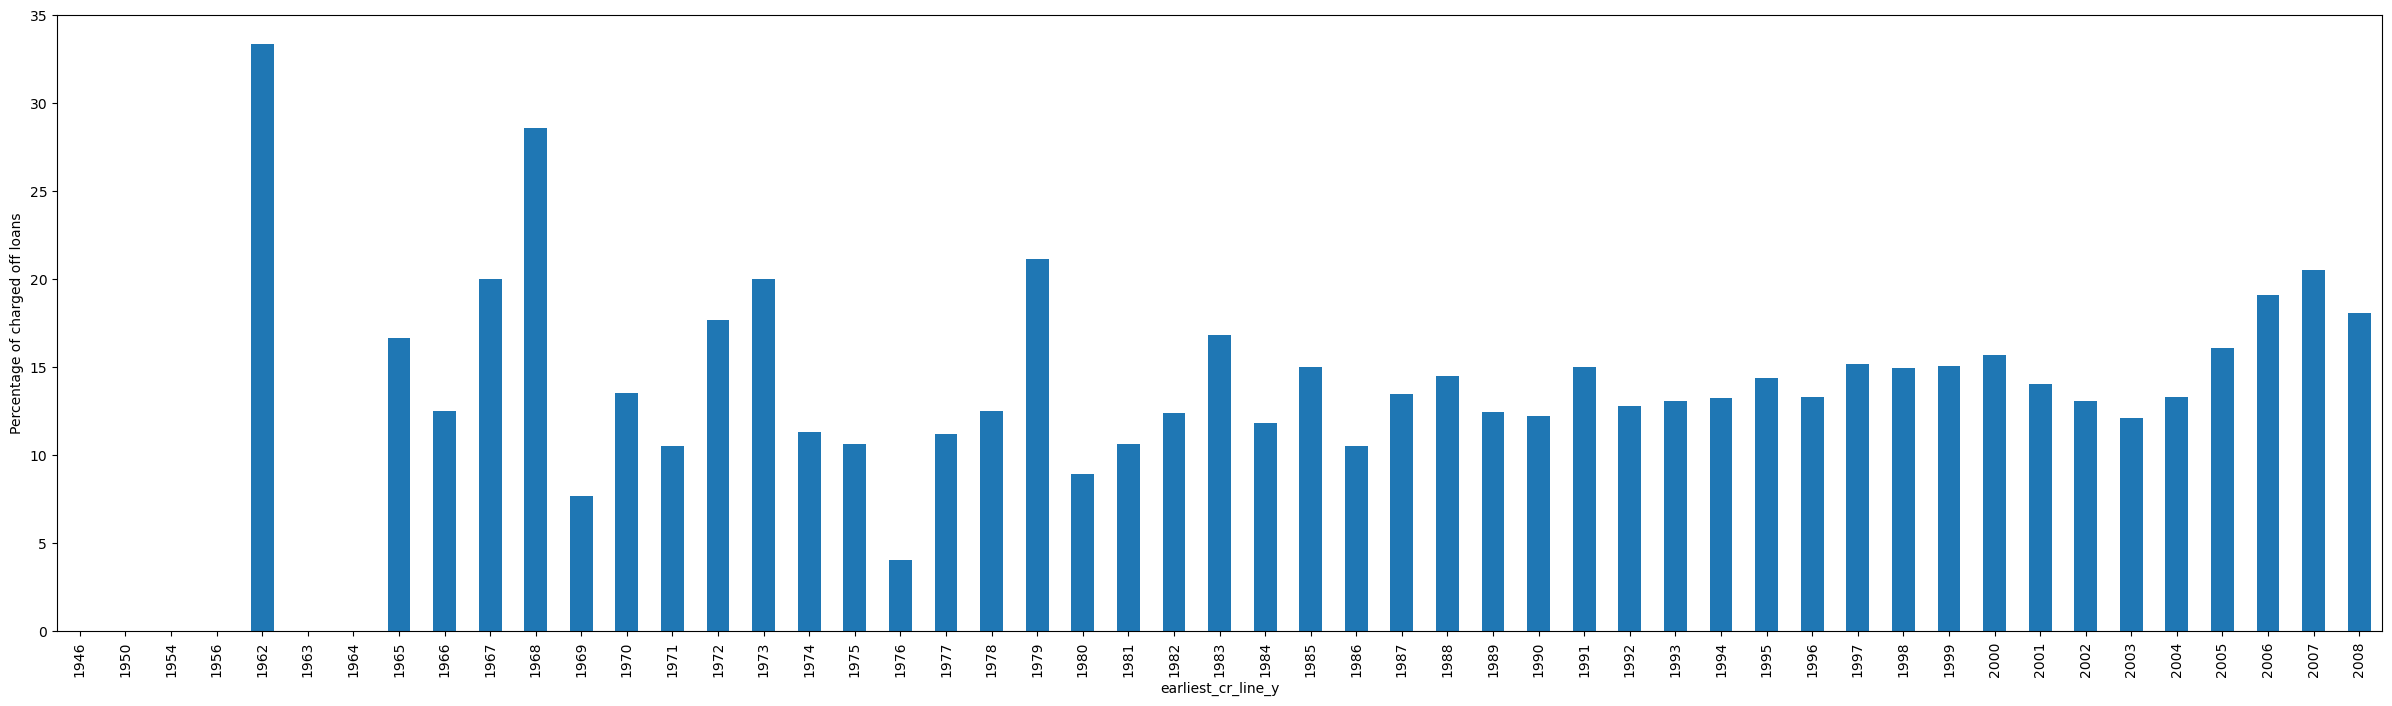

In [120]:
chargedoff_percentage = loan.groupby('earliest_cr_line_y')['charged off'].mean() *100
#fullypaid_percentage = (1- loan.groupby('addr_state')['charged off'].mean()) *100 
#percentages = pd.DataFrame({'Fully Paid': fullypaid_percentage,'Charged Off': chargedoff_percentage})
plt.figure(figsize=(30, 8))
chargedoff_percentage.plot(kind='bar' )
plt.ylabel('Percentage of charged off loans')
plt.show()

### Insights from the above univariate analysis on categorical columns

**Loan Status**: Most of the loans are fully paid however around 15% of the loans are charged off.<br>
**Loan Term** : Percentage of charged off loans is higher for loan term of 60 months.<br>
**Grade** : Percentage of charged off loans is higher for lower grades of loans.<br>
**Employment Length**: Percentage of charged off loans  is less than 20% for each experience level.<br>
**Home Ownership**:Percentage of charged off loans is more for other and mortgage category followed by rent and own.<br>
**Verification Status**: Percentage of charged off loans is less than 20% for each verification status.<br>
**Purpose**: Percentage of charged off loans are for purposes like  small_business, renewable energy educational, house and debt_consolidation. <br>
**Issue year**: Percentage of charged off loans  have somewhat decreased over the years but again increased in 2011.<br>
**Issue Month** : Percentage of charged off loans is higher in December, May and september compared to other months.<br>
**Number of derogatory public records** : Percentage of charged off loans  is higher for people who have 1 or 2 derogatory records.<br>
**Number of public record bankruptcies**: Percentage of charged off loans is higher for people with 1 and 2 bankruptcy records.<br>
**Incidences of delinquencies**: Percentage of charged off loans follows an overall upward trend with an increase in delinquency record.<br>
**Address state**: Percentage of charged off loans are higher for states having code NV, AK , TN.<br>
**Earliest credit line year**: Percentage of charged off loans show a sharp increase for people whose credit line starting year was in range 2003-2007. However highest Percentage of charged off loans  is for the credit line year 1962.<br>


## Univariate analysis on Numerical columns
<br>
For univariate analysis on Categorical columns we will use boxplot for each column

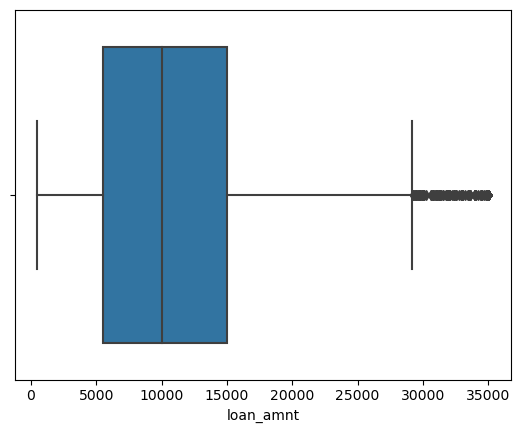

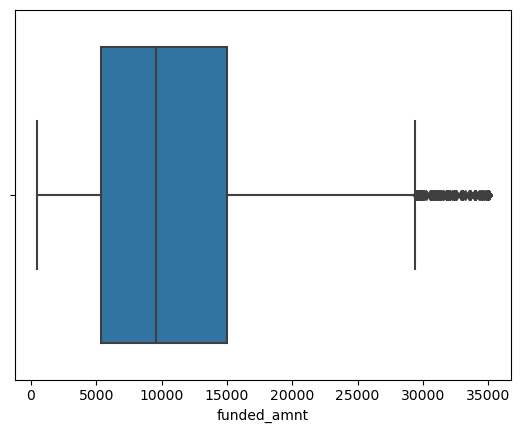

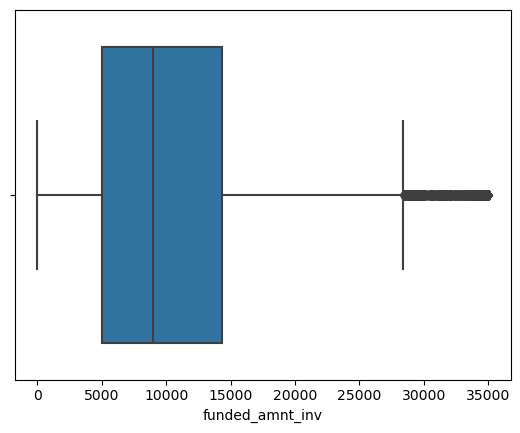

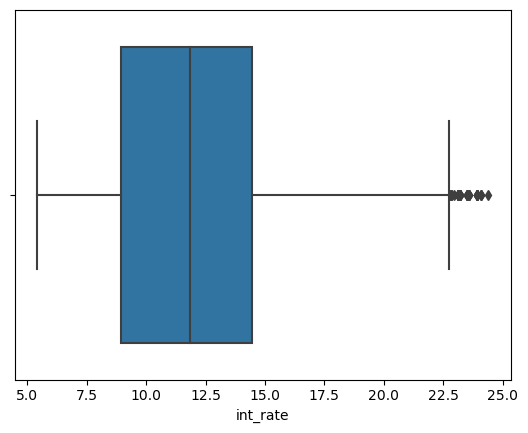

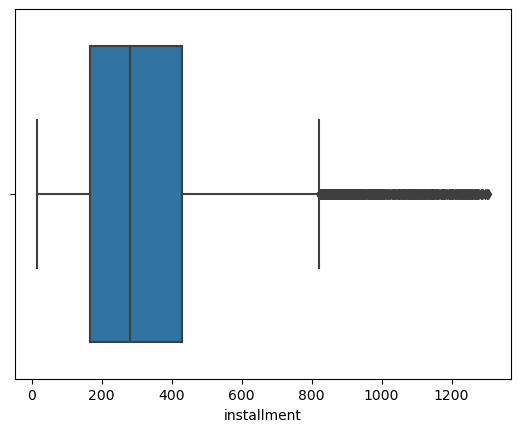

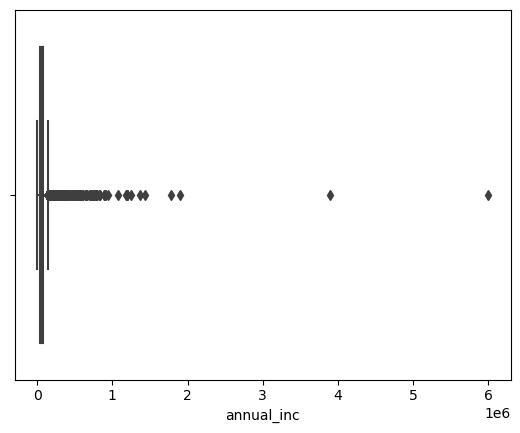

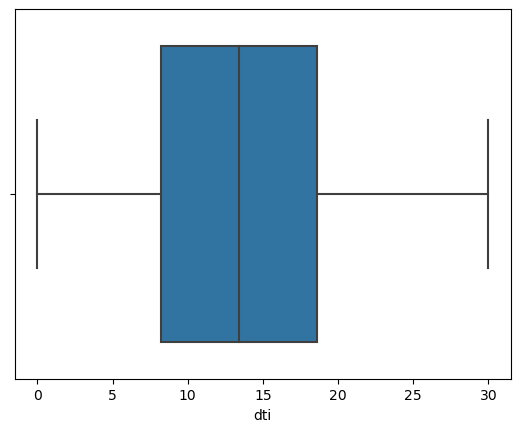

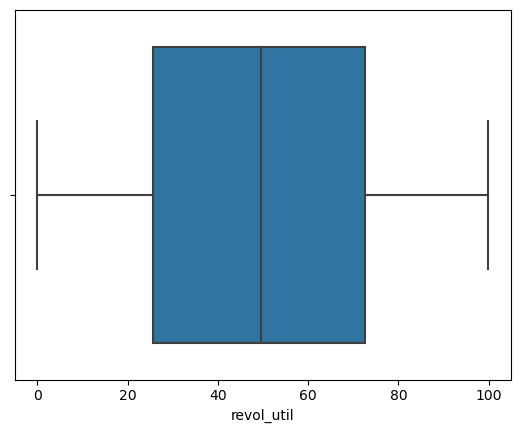

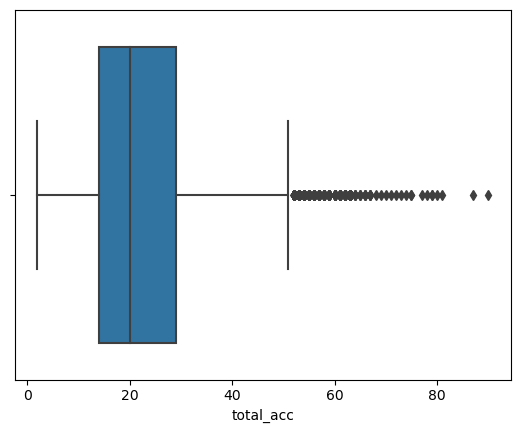

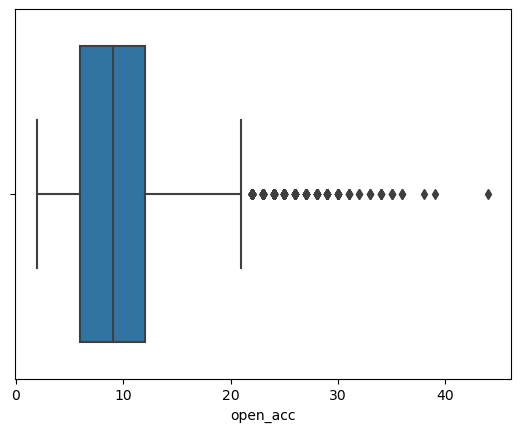

In [121]:
for i in num_col:
    
    sns.boxplot(x = loan[i])
    plt.show()

In [122]:
# We can see there are large number of outliers in annual income, 

In [123]:
loan.annual_inc.describe()

count    3.680000e+04
mean     6.943448e+04
std      6.402159e+04
min      4.000000e+03
25%      4.113300e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

some people who took loan have annual income of more than 1 million. Any income level which are outliers can be dropped since people will very high annual income will not default on their loan. So any value above 95%ile range shall be treated as abnormal value and can be dropped.

In [124]:
loan.annual_inc.quantile(q=0.95)

142000.0

In [125]:
#we can see 95% of people who took loans have less than 142K annual income so its safe to drop any value greater than this.

In [126]:
loan =  loan[loan.annual_inc <=141000] 

<Axes: xlabel='annual_inc'>

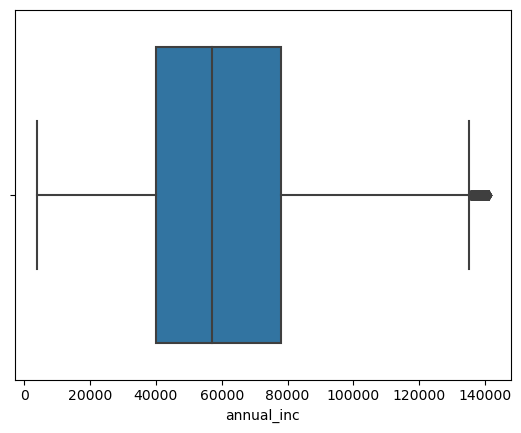

In [127]:
sns.boxplot(x = loan.annual_inc)

# Segemented Univariate

For our problem statement our primary segmentation will be loan status and we will apply this segmentation to all numerical columns


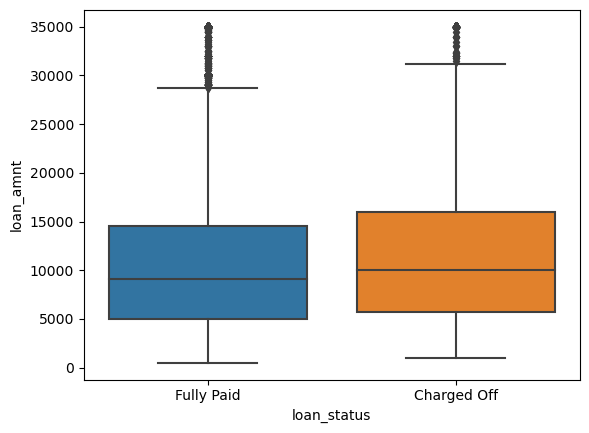

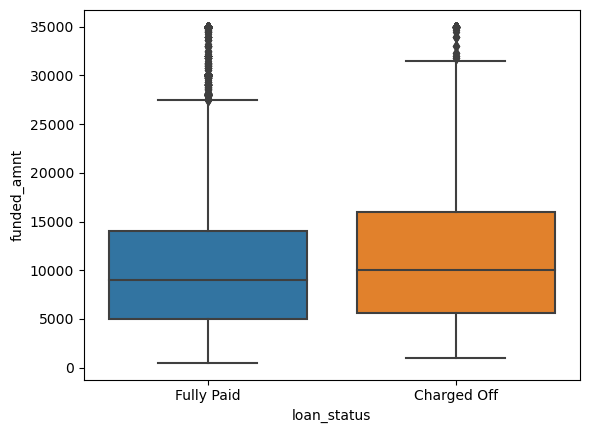

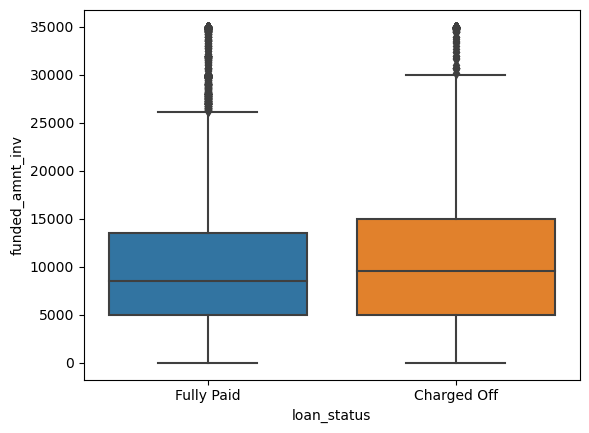

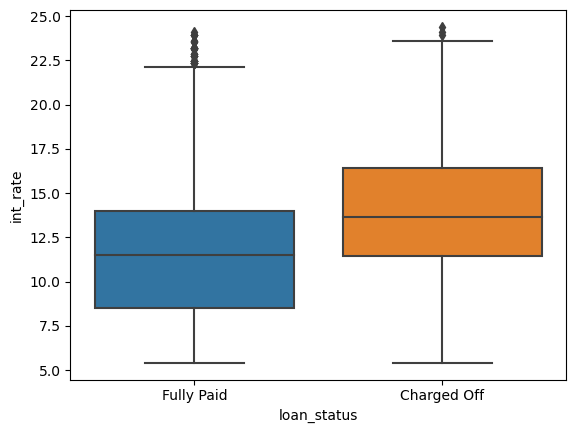

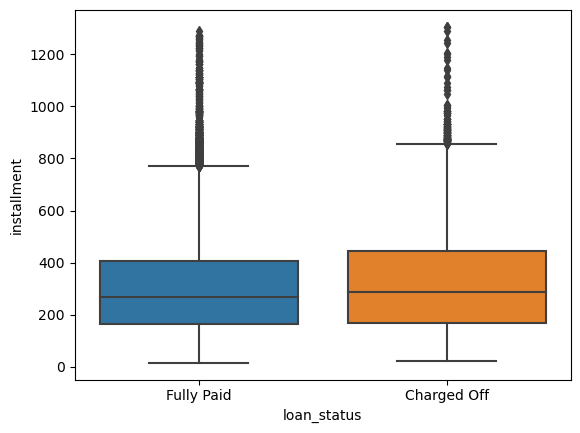

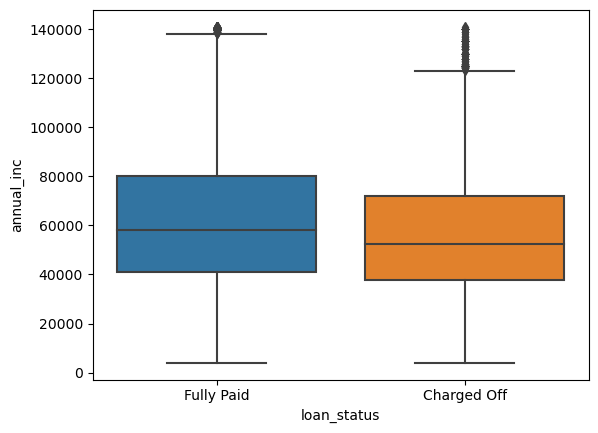

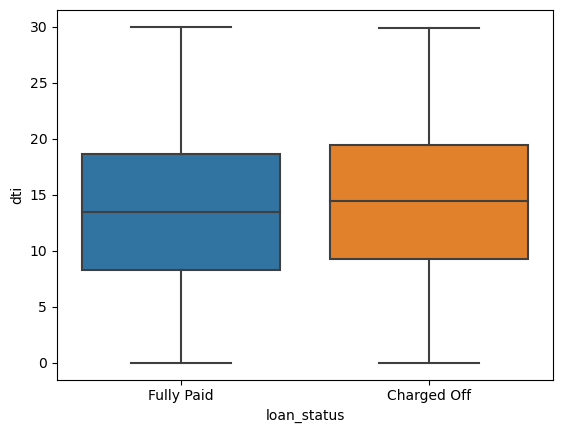

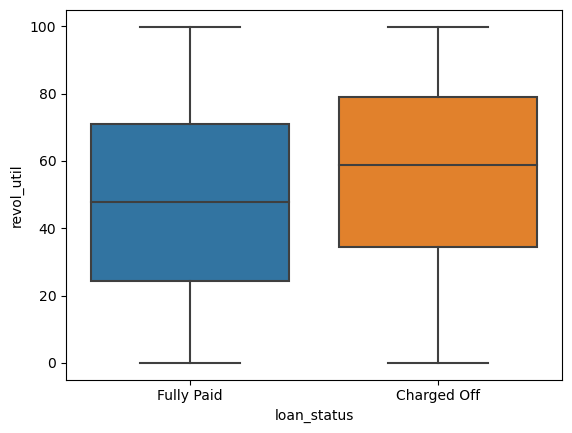

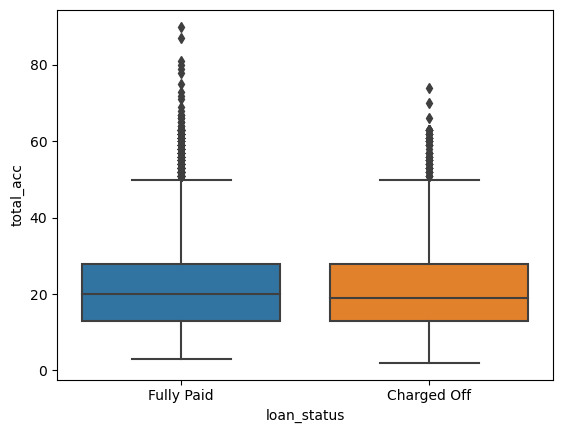

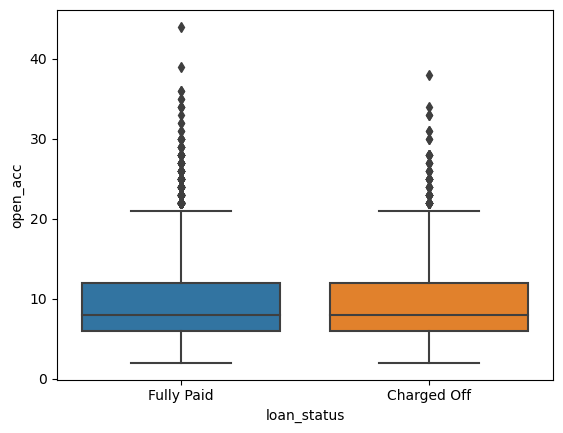

In [128]:
for i in num_col:
    sns.boxplot(x = loan['loan_status'],y = loan[i])
    plt.show()

### Insights from segmented univariate analysis

From the above segmented univariate analysis we can say that the following :
<br>
1. Loan amount, Funded amount and Funded amount by investors are high for people who are defaulters
2. Interest Rate is typically more for the loans which are charged off.
3. Annual Income is slightly lower for loans which are charged off.
4. Dti ratio is slightly higher for loans which are charged off.
5. Revolving Utilization is higher for loans which are charged off.

We shall mainly focus on the above numerical columns for our bivariate analysis

# Bivariate Analaysis

In [130]:
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line_y',
 'pub_rec',
 'pub_rec_bankruptcies',
 'issue_year',
 'issue_month',
 'delinq_2yrs']

In [131]:
num_col

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'revol_util',
 'total_acc',
 'open_acc']

### numerical vs numerical

Overall correlation : 0.28948053891058945


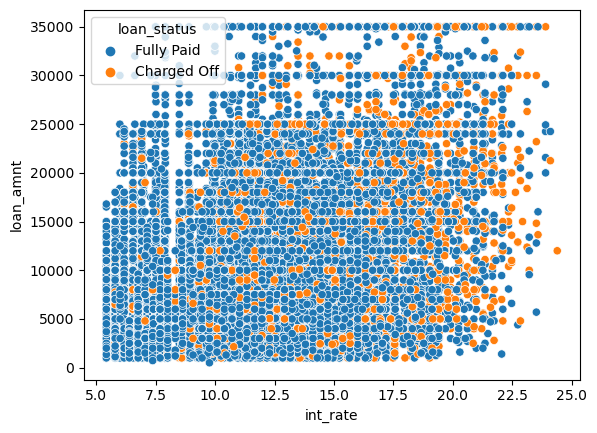

Overall correlation : 0.3998738428954058


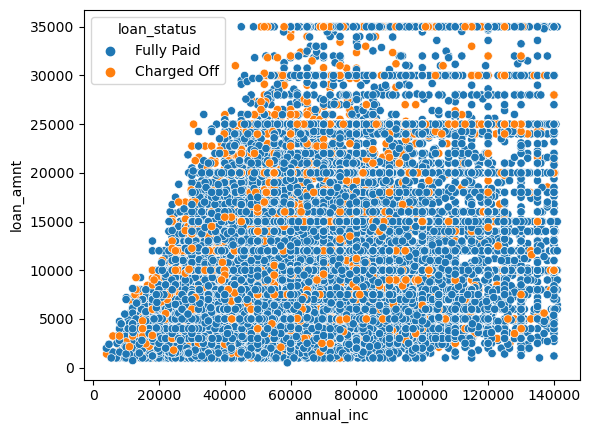

Overall correlation : 0.08879651197941504


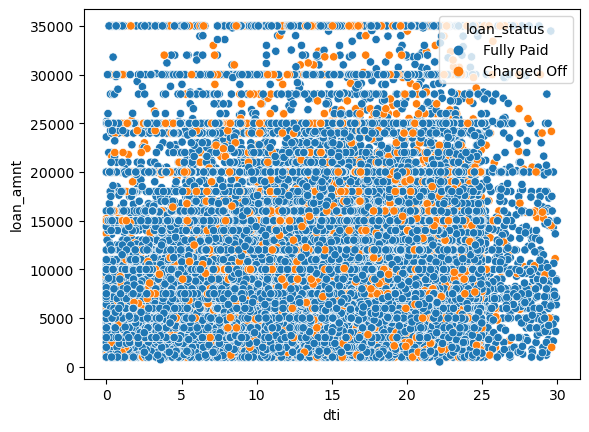

Overall correlation : 0.06795812156743913


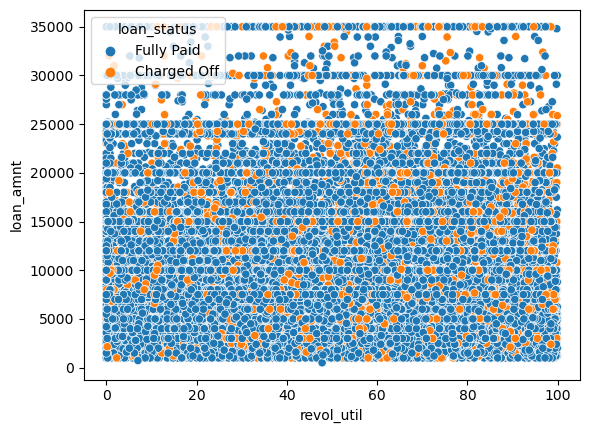

In [132]:
for col in ['int_rate','annual_inc','dti','revol_util']:
    
    print(f'Overall correlation : {loan.loan_amnt.corr(loan[col])}')
    sns.scatterplot(y=loan.loan_amnt,x=loan[col],hue =loan['loan_status'])
    plt.show()


### Insights from numerical vs numerical bivariate analysis

Loan amount vs interest rate: There is a small correlation between interest rate and loan amount. Higher the loan amount higher the interest rate. Also there are large number of charged off loans in the high interest high amount range<br>

Loan amount vs annual income: In the income range of 0-40000, people with low income takes loan of lower amount.<br>

Loan amount vs dti: There is a weak correlation between these two columns. Also we can see
people with high dti values are also getting high loan amounts.<br>

Loan amount vs revolving utilization: There is a weak correlation between these two columns. Also we can seepeople with high utilization values are also getting high loan amounts.<br>


### Numerical vs Categorical

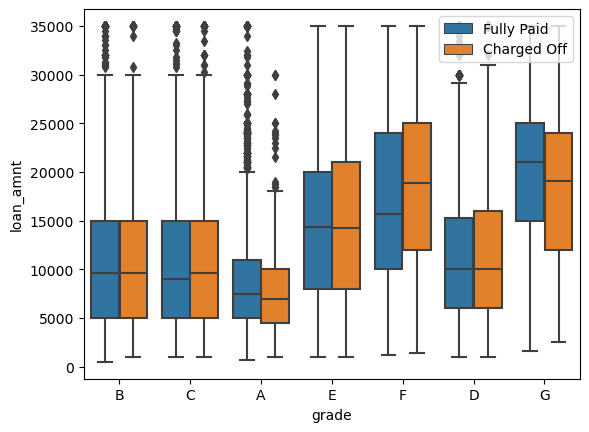

In [133]:
sns.boxplot(y='loan_amnt', x='grade', hue ='loan_status',data=loan)
plt.legend(loc='upper right')
plt.show()

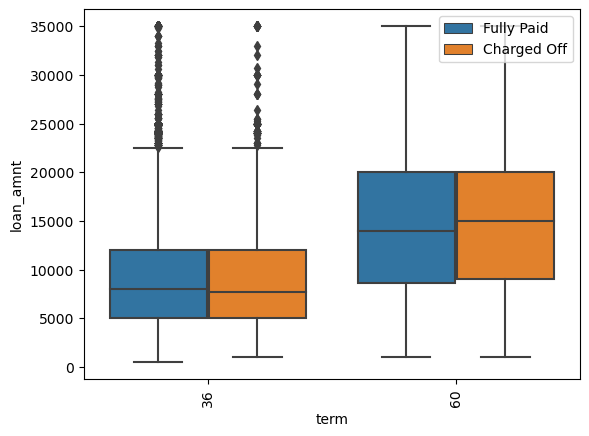

In [134]:
sns.boxplot(y='loan_amnt', x='term', hue ='loan_status',data=loan)
plt.xticks(rotation =90)
plt.legend(loc='upper right')
plt.show()

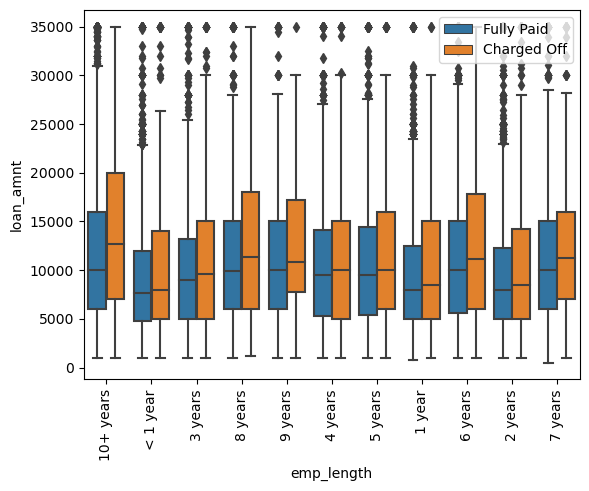

In [135]:
sns.boxplot(y='loan_amnt', x='emp_length', hue ='loan_status',data=loan)
plt.xticks(rotation =90)
plt.legend(loc='upper right')
plt.show()

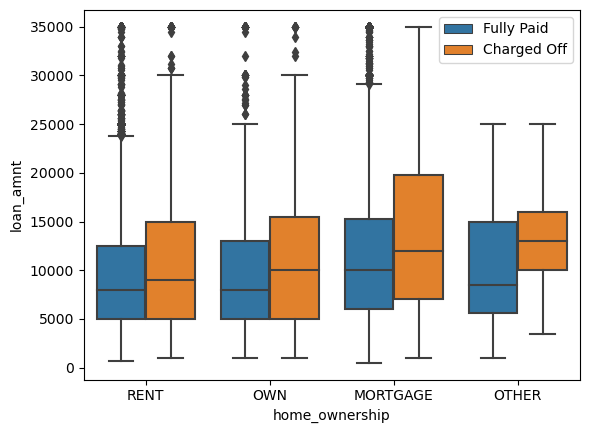

In [136]:
sns.boxplot(y='loan_amnt', x='home_ownership', hue ='loan_status',data=loan)
plt.legend(loc='upper right')
plt.show()

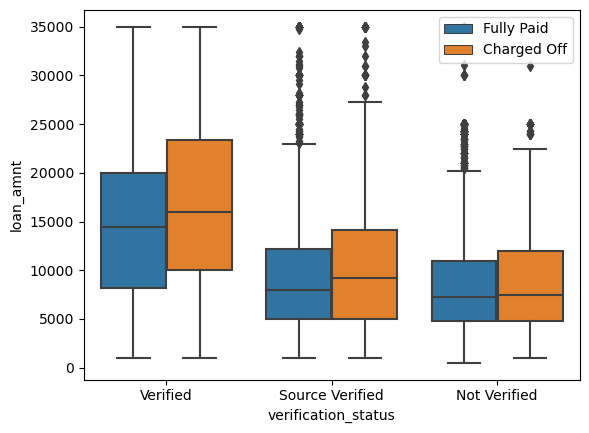

In [137]:
sns.boxplot(y='loan_amnt', x='verification_status', hue ='loan_status',data=loan)
plt.legend(loc='upper right')
plt.show()

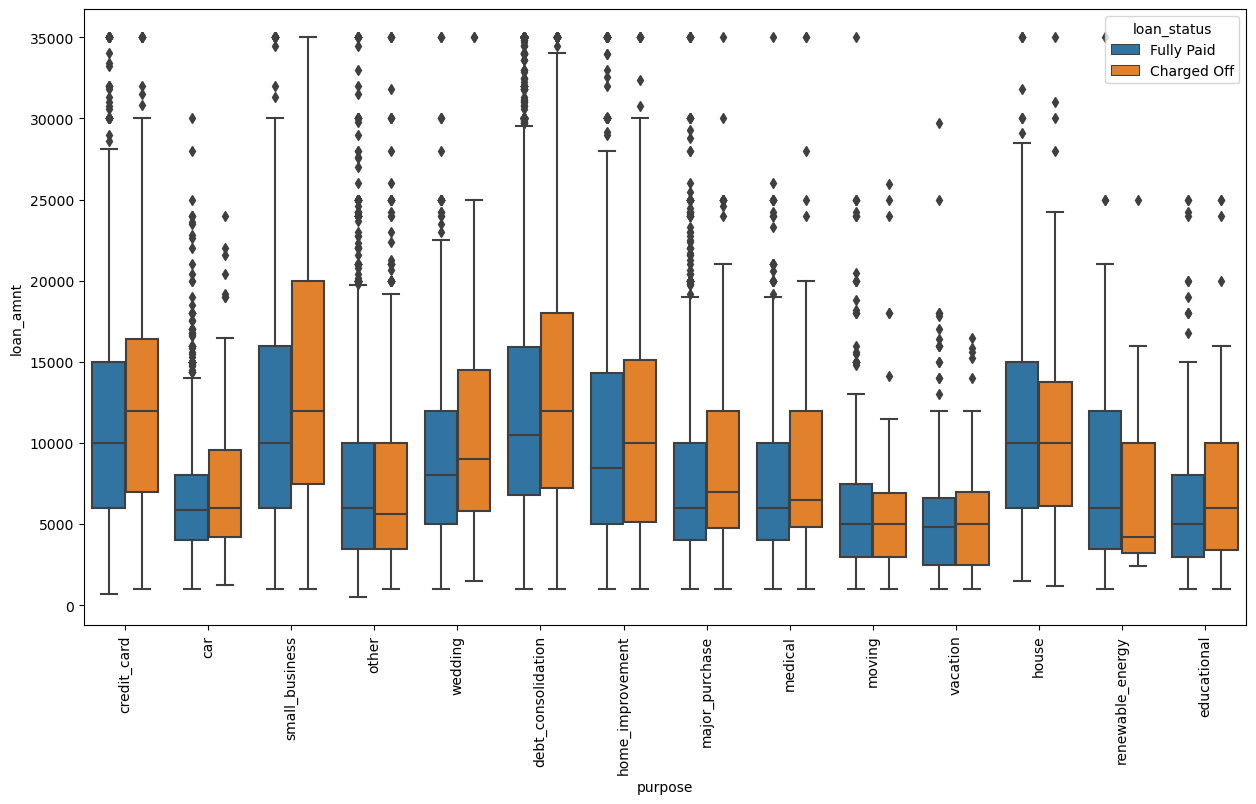

In [138]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='loan_amnt', x='purpose', hue ='loan_status',data=loan)
plt.xticks(rotation = 90)
plt.show()

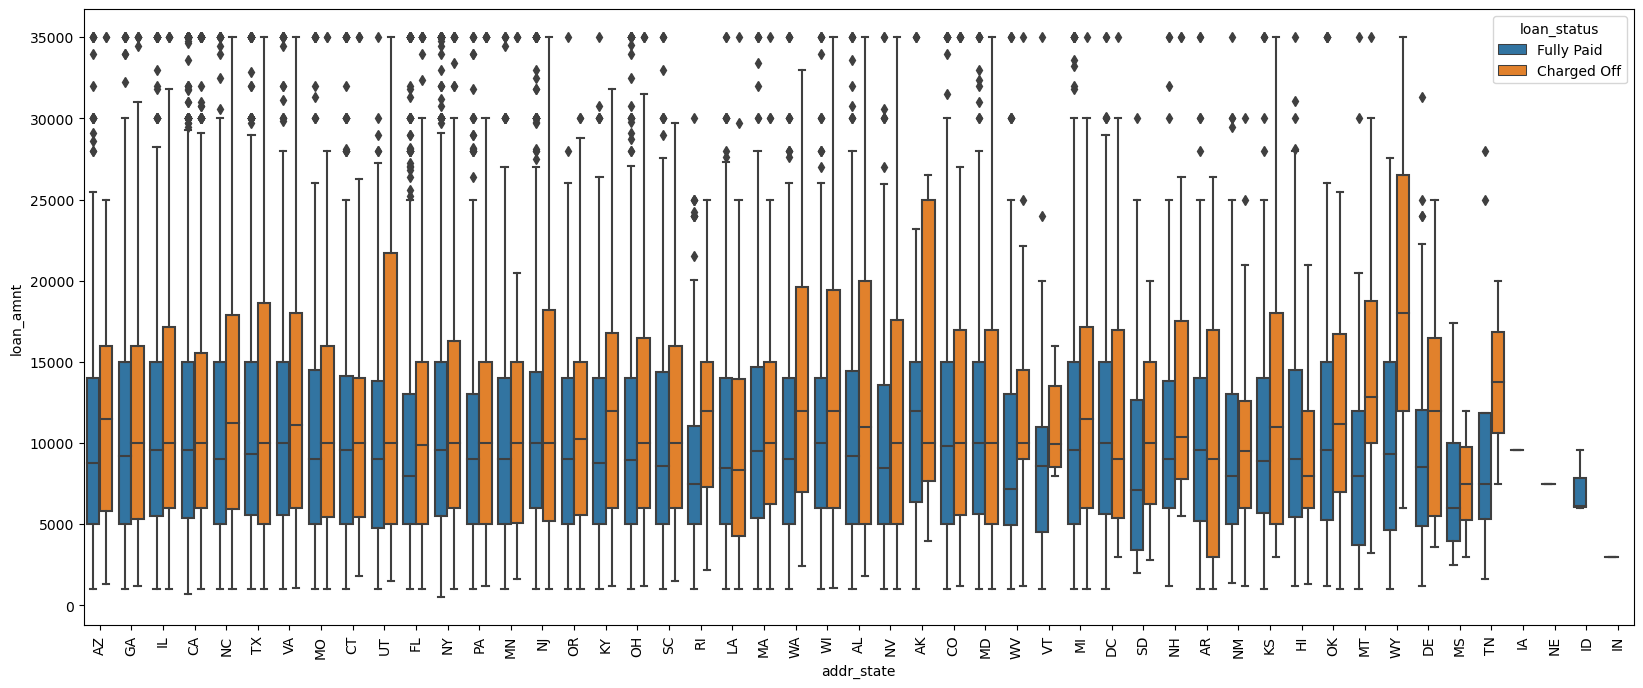

In [139]:
plt.figure(figsize=(20, 8))
sns.boxplot(y='loan_amnt', x='addr_state', hue ='loan_status',data=loan)
plt.xticks(rotation = 90)
plt.show()

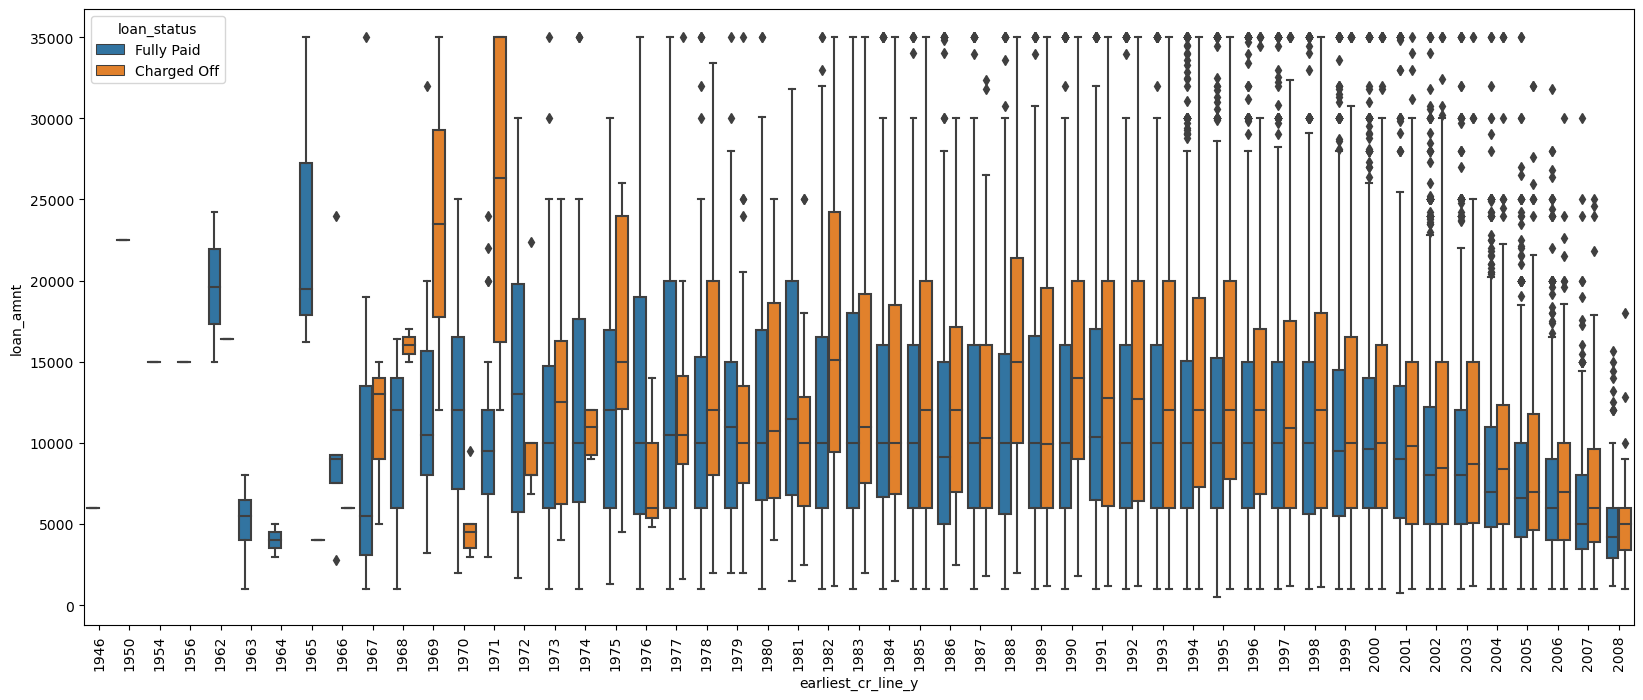

In [140]:
plt.figure(figsize=(20, 8))
sns.boxplot(y='loan_amnt', x='earliest_cr_line_y', hue ='loan_status',data=loan )
plt.xticks(rotation = 90)
plt.show()

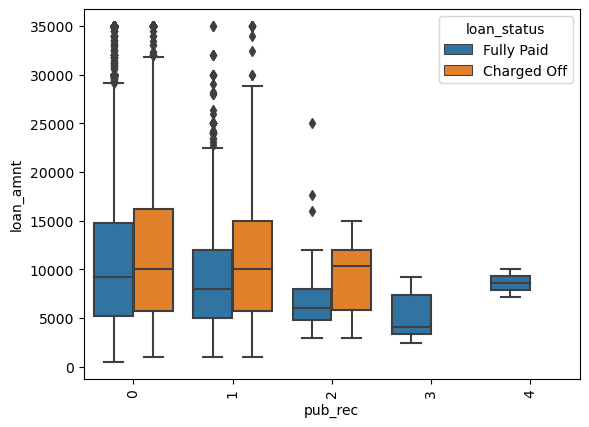

In [141]:

sns.boxplot(y='loan_amnt', x='pub_rec', hue ='loan_status',data=loan )
plt.xticks(rotation = 90)
plt.show()

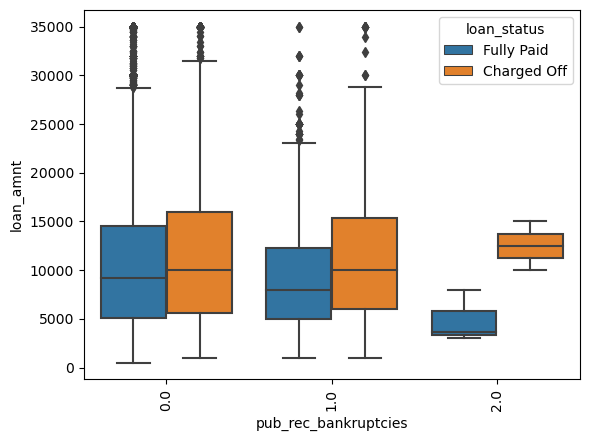

In [142]:

sns.boxplot(y='loan_amnt', x='pub_rec_bankruptcies', hue ='loan_status',data=loan )
plt.xticks(rotation = 90)
plt.show()

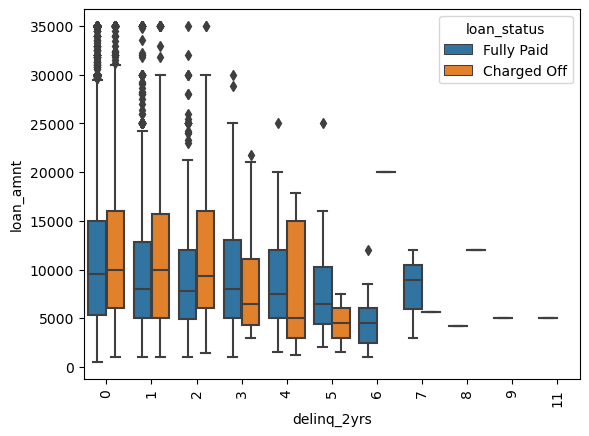

In [143]:

sns.boxplot(y='loan_amnt', x='delinq_2yrs', hue ='loan_status',data=loan )
plt.xticks(rotation = 90)
plt.show()

### Insights from Numerical vs Categorical Bivariate

**Loan amount vs Grade:** Charged off **Loan amounts are higher for lower grades D, E and F.<br>
**Loan amount vs Term:** Loan amounts are overall higher for higher term but there is no significant difference between charged off and fully paid Loan amounts for each term.<br>
**Loan amount vs Employment Length:** Loan amounts for higher experience levels are slightly higher but no significant trend observed.<br>
**Loan amount vs Homeownership:**  Loan amounts are quite higher for Mortgage home and also charged off Loans are higher for Mortgage home.<br>
**Loan amount vs Verification status:** Loan amounts are higher for verified applicants followed by source verified and not verified.<br>
**Loan amount vs Public records:** Higher Loan amounts to people with derogatory public records have been charged off.<br>
**Loan amount vs public recorded bankruptcies:** Higher Loan amounts to people with bankruptcy records have been charged off.<br>
**Loan amount vs delinquency:** Loan amounts are same for till delinquency record of 4 but charged off Loan has increased with increase in delinquency records.<br>
**Loan amount vs Purpose:** Higher Loan amounts have been sanctioned to purposes like small business, debt consolidation, credit card and home improvement and also the charged off amount is higher for these purposes.<br>
**Loan amount vs Address State:** Higher Loan amounts have been sanctioned to address state UT,AK, WY,TN  and charged off amount is also higher for these states.<br>
**Loan amount vs Earliest Credit line year:** Lower Loan amounts have been given to newer accounts but  charged off Loan amount  is more for newer accounts compared to fully paid Loans.<br>